# ¿Cuál es la mejor tarifa?

 La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np



## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
import pandas as pd
df_megaline_calls= pd.read_csv("/datasets/megaline_calls.csv")
df_megaline_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_megaline_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_megaline_users = pd.read_csv("/datasets/megaline_users.csv")

In [ ]:
print("Información de df_megaline_calls:")
print(df_megaline_calls.info())

print("\nInformación de df_megaline_internet:")
print(df_megaline_internet.info())

print("\nInformación de df_megaline_messages:")
print(df_megaline_messages.info())

print("\nInformación de df_megaline_plans:")
print(df_megaline_plans.info())

print("\nInformación de df_megaline_users:")
print(df_megaline_users.info())

Información de df_megaline_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Información de df_megaline_internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Información de df_megaline_messages:
<class 'pandas.core.frame.

In [ ]:
print(df_megaline_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [ ]:
df_megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print("Información resumida de df_megaline_planss:")
print(df_megaline_plans)

Información resumida de df_megaline_planss:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [ ]:
# Imprime una muestra de los datos para las tarifas
df_megaline_plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



se puede observar que los espacios están delimitados por "_", se cambiará al formato, y que el nombre de las tarifas se encuentran al final y no al principio

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
columns = [
    "messages_included",
    "mb_per_month_included",
    "minutes_included",
    "usd_monthly_pay",
    "usd_per_gb",
    "usd_per_message",
    "usd_per_minute",
    "plan_name"
]


columns = [col.replace("_", " ") for col in columns]

print(columns)

['messages included', 'mb per month included', 'minutes included', 'usd monthly pay', 'usd per gb', 'usd per message', 'usd per minute', 'plan name']


## Enriquecer los datos

In [ ]:
# Mover "plan_name" a la primera posición
df_megaline_plans.insert(0, 'plan_name', df_megaline_plans.pop('plan_name'))

# Imprimir el DataFrame para verificar el cambio
print(df_megaline_plans)

  plan_name  messages_included  mb_per_month_included  minutes_included  \
0      surf                 50                  15360               500   
1  ultimate               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               20          10             0.03            0.03   
1               70           7             0.01            0.01   

   internet_included  
0                 15  
1                 30  


In [ ]:
#agregar una columna que contenga los gb incluidos
df_megaline_plans['internet_included'] = df_megaline_plans['mb_per_month_included'] / 1024
# Cambia el tipo de dato de la columna 'internet_included' a 'int64'
df_megaline_plans['internet_included'] = df_megaline_plans['internet_included'].astype('int64')

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print("Información resumida de df_megaline_users:")
print(df_megaline_users)

Información resumida de df_megaline_users:
     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf

In [ ]:
# Imprime una muestra de datos para usuarios

df_megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


De igual forma en el siguiente DF se puede observar en el nombre de las columnas que hay nombres con guiones bajos y también hay elementos ausentes

### Corregir los datos

In [ ]:
columns = [
    "user_id",
    "first_name",
    "last_name",
    "reg_date",
    "churn_date"
    
]


columns = [col.replace("_", " ") for col in columns]

print(columns)

['user id', 'first name', 'last name', 'reg date', 'churn date']


In [ ]:
# Cambiar los tipo de datos de `reg_date` a tipo `datetime`
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'], format='%Y-%m-%d')
# Cambiar los tipos de datos de 'churn_date' que no son nulos a tipo 'datetime'
df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
print(df_megaline_users.isna().sum()) #se buscaron valores ausentes

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [ ]:
print(df_megaline_users.fillna(value="")) # se reemplazaron los valores ausentes

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

In [ ]:
df_megaline_users["reg_date"] = pd.to_datetime(df_megaline_users["reg_date"])

# Extraer el mes y añadirlo como una nueva columna
df_megaline_users["month"] = df_megaline_users["reg_date"].dt.month

# Mostrar las primeras filas para verificar
print(df_megaline_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  month  
0 2018-12-24  ultimate        NaN     12  
1 2018-08-13      surf        NaN      8  
2 2018-10-21      surf        NaN     10  
3 2018-01-28      surf        NaN      1  
4 2018-05-23      surf        NaN      5  


In [ ]:
df_megaline_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [ ]:
# Crear una función que calcule los meses de servicio que ha tenido cada usuario
def calc_service_months(user):
    """
    evalúar si el usuario sigue activo o dejó el servicio y posteriormente calcúla los meses de servicio.
    """
    if pd.isnull(user['leave_date']):
            months = 13 - (user['reg_month'])
    else:
            months = (user['leave_date']) - user['reg_month'] + 1
    return months

In [ ]:
# Agregar una columnasi el usuario está en la zona de NY o NJ
df_megaline_users['isin_ny_nj'] = df_megaline_users['city'].str.contains('NY|NJ')
# Añade una columna con el mes en el que el usuario se registró.
df_megaline_users['reg_month'] = df_megaline_users['reg_date'].dt.month
# Añade una columna con el mes en que el usuario dejó de usar el servicio.
df_megaline_users['leave_date'] = df_megaline_users['churn_date'].dt.month
# Añade una columna con la cantidad de meses de servicio.
df_megaline_users['service_months'] = df_megaline_users.apply(calc_service_months, axis=1)

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print("Información de df_megaline_calls:")
print(df_megaline_calls.info())

Información de df_megaline_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [ ]:
# Imprime una muestra de datos para las llamadas
df_megaline_calls


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Corregir los datos

se reemplazaran los valores de las columnas con guíon bajo

In [ ]:
columns = [
    "user_id",
    "call_date"   
]


columns = [col.replace("_", " ") for col in columns]

print(columns)

['user id', 'call date']


In [ ]:
# Eliminar las llamadas que duraron 0.0
df_megaline_calls = df_megaline_calls[~(df_megaline_calls['duration']==0)]
# Cambia la columna 'call_date' a 'datetime'
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'], format='%Y-%m-%d')
# Redondea las cifras de 'duration' hacia arriba.
df_megaline_calls['duration'] = np.ceil(df_megaline_calls['duration'])
# # Cambia el tipo de dato de la columna 'duration' a tipo 'int'
df_megaline_calls['duration'] = df_megaline_calls['duration'].astype('int64')

In [ ]:

# Agrega la columna 'plan' a la variable 'data_calls
df_megaline_calls = df_megaline_calls.set_index('user_id').join(df_megaline_calls[['user_id', 'plan']].set_index('user_id'))
# Resetea el índice
df_megaline_calls = df_megaline_calls.reset_index()

KeyError: "['plan'] not in index"

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
#se agregan los datos de month
df_megaline_calls["call_date"] = pd.to_datetime(df_megaline_calls["call_date"])

# Extraer el mes y añadirlo como una nueva columna
df_megaline_calls["month"] = df_megaline_calls["call_date"].dt.month

# Mostrar las primeras filas para verificar
print(df_megaline_calls.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27      8.52     12
1  1000_145     1000 2018-12-27     13.66     12
2  1000_247     1000 2018-12-27     14.48     12
3  1000_309     1000 2018-12-28      5.76     12
4  1000_380     1000 2018-12-30      4.22     12


In [ ]:
# Revisar la distribución de la columna 'duration'
print(df_megaline_calls['duration'].describe())

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")
print(df_megaline_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [ ]:
# Imprime una muestra de datos para los mensajes

df_megaline_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
columns = [
    "user_id",
    "message_date"   
]


columns = [col.replace("_", " ") for col in columns]

print(columns)

['user id', 'message date']


In [ ]:
# Cambiar la columna 'message_date' a tipo 'datetime'
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [ ]:
df_megaline_messages["message_date"] = pd.to_datetime(df_megaline_messages["message_date"])

# Extraer el mes y añadirlo como una nueva columna
df_megaline_messages["month"] = df_megaline_messages["message_date"].dt.month

# Mostrar las primeras filas para verificar
print(df_megaline_messages.head())

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

print("\nInformación de df_megaline_internet:")
print(df_megaline_internet.info())



Información de df_megaline_internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [ ]:
# Imprime una muestra de datos para el tráfico de internet

df_megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
columns = [
    "user_id",
    "session_date",
    "mb_used"
]


columns = [col.replace("_", " ") for col in columns]

print(columns)

['user id', 'session date', 'mb used']


In [ ]:
# Cambia el tipo de dato de la columna 'session_date' a tipo 'datetime'
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
df_megaline_internet["session_date"] = pd.to_datetime(df_megaline_internet["session_date"])

# Extraer el mes y añadirlo como una nueva columna
df_megaline_internet["month"] = df_megaline_internet["session_date"].dt.month

# Mostrar las primeras filas para verificar
print(df_megaline_internet.head())

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_megaline_plans[["plan_name","usd_monthly_pay"]]

,plan_name,usd_monthly_pay
0,surf,20
1,ultimate,70


In [ ]:
df_megaline_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

number_calls = df_megaline_calls.groupby('user_id')["call_date"].count()
print(number_calls)
#se puede ver el número de llamadas hechas por cada usuario agrupando en un filtrado del dataframe por nombre de usuario y con la suma de numero de veces de llamadas por duracion

user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: call_date, Length: 481, dtype: int64


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_calls = df_megaline_calls.groupby('user_id')["duration"].sum()
print(minutes_calls)

user_id
1000     116.83
1001    1640.46
1002     777.13
1003    1041.00
1004    2618.95
         ...   
1495    1666.41
1496    1376.21
1497     276.53
1498    3029.97
1499    1450.31
Name: duration, Length: 481, dtype: float64


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_calls = df_megaline_messages.groupby('user_id')["message_date"].count()
print(messages_calls)

user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: message_date, Length: 402, dtype: int64


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

trafic_internet = df_megaline_internet.groupby('user_id')['mb_used'].count()
print(trafic_internet)

user_id
1000      5
1001    245
1002    124
1003     52
1004    460
       ... 
1495    290
1496    225
1497     31
1498    657
1499    220
Name: mb_used, Length: 489, dtype: int64


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [ ]:
df_megaline_users[set(df_megaline_calls.columns) & set(df_megaline_users.columns)]

,month,user_id
0,12,1000
1,8,1001
2,10,1002
3,1,1003
4,5,1004
...,...,...
495,9,1495
496,2,1496
497,12,1497
498,2,1498


In [ ]:
#fusiona los datos de llamadas, internet y mensajes en "user_id" y "mounth"
df_full = df_megaline_users.set_index(["user_id", "month"])\
    .join(df_megaline_calls.groupby(["user_id", "month"])["duration"].sum().rename("total_duration"))\
    .join(df_megaline_messages.groupby(["user_id", "month"]).size().rename("n_messages"))\
    .join(df_megaline_internet.groupby(["user_id", "month"]).size().rename("n_internet"))
          
print(df_full)

              first_name   last_name  age  \
user_id month                               
1000    12      Anamaria       Bauer   45   
1001    8         Mickey   Wilkerson   28   
1002    10        Carlee     Hoffman   36   
1003    1       Reynaldo     Jenkins   52   
1004    5        Leonila    Thompson   40   
...                  ...         ...  ...   
1495    9          Fidel      Sharpe   67   
1496    2          Ariel    Shepherd   49   
1497    12         Donte     Barrera   49   
1498    2           Scot  Williamson   51   
1499    5          Shena     Dickson   37   

                                                    city   reg_date      plan  \
user_id month                                                                   
1000    12         Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1001    8                Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
1002    10          Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
1003    1

In [ ]:
df_full

,,first_name,last_name,age,city,reg_date,plan,churn_date,total_duration,n_messages,n_internet
user_id,month,,,,,,,,,,
1000,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,116.83,11.0,5.0
1001,8,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,171.14,30.0,25.0
1002,10,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,54.13,15.0,21.0
1003,1,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,NaN,NaN,NaN
1004,5,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,181.58,7.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,9,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,283.46,NaN,71.0
1496,2,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,NaN,NaN,NaN
1497,12,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,276.53,50.0,31.0


In [ ]:
df_megaline_plans

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


In [ ]:
# Añade la información de la tarifa

# Añade la columna del plan que tiene cada usuario y si se encuentra el la zona de New York o New Jersey
total_consume_user_month = df_megaline_plans.join(df_megaline_plans[['user_id', 'plan', 'isin_ny_nj']].set_index('user_id'))
# Añade a cada usuario la información del plan que tiene
total_consume_user_month = total_consume_user_month.join(df_megaline_plans.set_index('plan_name'), on='plan')

KeyError: "None of [Index(['user_id', 'plan', 'isin_ny_nj'], dtype='object')] are in the [columns]"

In [ ]:
df_full

,,first_name,last_name,age,city,reg_date,plan,churn_date,total_duration,n_messages,n_internet
user_id,month,,,,,,,,,,
1000,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,116.83,11.0,5.0
1001,8,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,171.14,30.0,25.0
1002,10,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,54.13,15.0,21.0
1003,1,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,NaN,NaN,NaN
1004,5,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,181.58,7.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,9,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,283.46,NaN,71.0
1496,2,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,NaN,NaN,NaN
1497,12,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,276.53,50.0,31.0


In [ ]:
def calc_income(user):
    if user['plan'] == 'surf':
        if (user['minutes_included']<user['tot_duration']):
            # user['column_1'] = abs((user['minutes_included'] - user['tot_duration']) * 0.03)
            num1 = abs((user['minutes_included'] - user['tot_duration']) * 0.03)
        else:
            num1 = 0
        if (user['messages_included']<user['num_messages']):
            num2 = abs((user['messages_included'] - user['num_messages']) * 0.03)
        else:
            num2 = 0
        if (user['internet_included']<user['gb_used_month']):
            num3 = abs((user['internet_included'] - user['gb_used_month']) * 10)
        else:
            num3 = 0
    else:
        if (user['minutes_included']<user['tot_duration']):
            num1 = abs((user['minutes_included'] - user['tot_duration']) * 0.01)
        else:
            num1 = 0

        if (user['messages_included']<user['num_messages']):
            num2 = abs((user['messages_included'] - user['num_messages']) * 0.01)
        else:
            num2 = 0

        if (user['internet_included']<user['gb_used_month']):
            num3 = abs((user['internet_included'] - user['gb_used_month']) * 7)
        else:
            num3 = 0
    return num1, num2, num3

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

        plan  month  total_duration
0       surf      1      192.840000
1       surf      2      171.500000
2       surf      3      250.392500
3       surf      4      242.457333
4       surf      5      146.563333
5       surf      6      234.675000
6       surf      7      168.293077
7       surf      8      204.420556
8       surf      9      196.051429
9       surf     10      201.131538
10      surf     11      268.985238
11      surf     12      327.818400
12  ultimate      1      183.162500
13  ultimate      2       86.040000
14  ultimate      3       73.395000
15  ultimate      4      201.444000
16  ultimate      5      229.693333
17  ultimate      6      279.281000
18  ultimate      7      128.170000
19  ultimate      8      242.061667
20  ultimate      9      327.438571
21  ultimate     10      312.671429
22  ultimate     11      174.840000
23  ultimate     12      131.988750


<Figure size 1200x800 with 0 Axes>

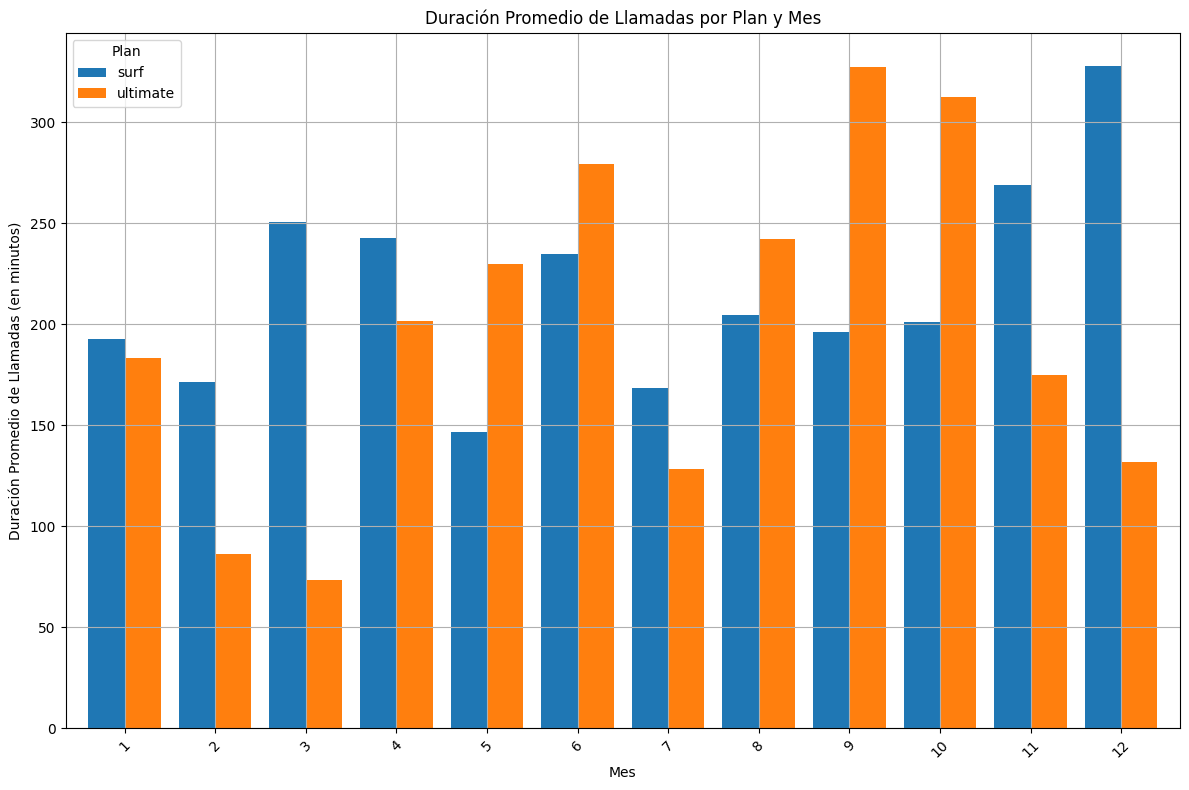

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import pandas as pd
import matplotlib.pyplot as plt

average_duration = df_full.groupby(['plan', 'month'])['total_duration'].mean().reset_index()

print(average_duration)

plt.figure(figsize=(12, 8))

pivot_table = average_duration.pivot(index='month', columns='plan', values='total_duration')


pivot_table.plot(kind='bar', figsize=(12, 8), width=0.8)


plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (en minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

   plan  month  total_duration
0  surf      1          385.68
1  surf      2          857.50
2  surf      3         2003.14
3  surf      4         3636.86
4  surf      5         1319.07


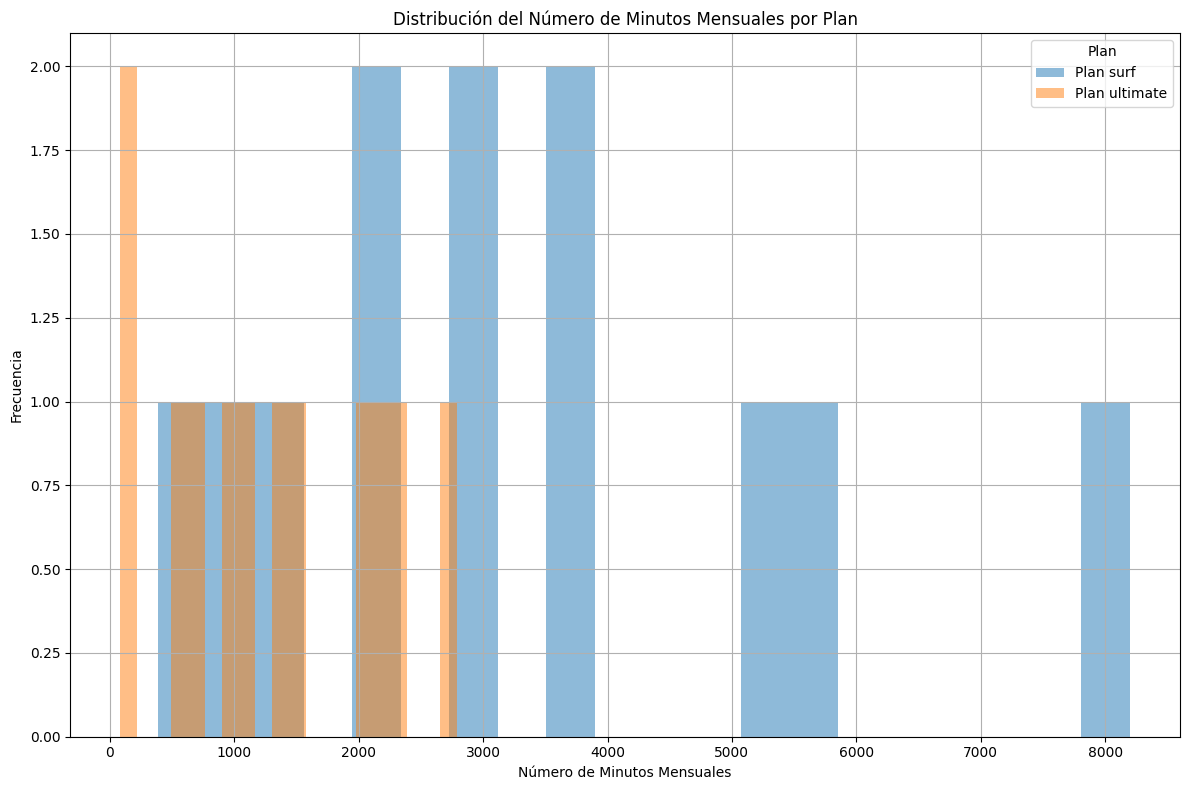

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

monthly_minutes = df_full.groupby(['plan', 'month'])['total_duration'].sum().reset_index()

print(monthly_minutes.head())

plt.figure(figsize=(12, 8))


for plan in monthly_minutes['plan'].unique():
    
    data = monthly_minutes[monthly_minutes['plan'] == plan]['total_duration']
    plt.hist(data, bins=20, alpha=0.5, label=f'Plan {plan}')


plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Número de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()


plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_duration = df_full.groupby('month')['total_duration'].sum().reset_index()

# Calcular la media y la varianza de la duración mensual de llamadas
mean_duration = monthly_duration['total_duration'].mean()
variance_duration = monthly_duration['total_duration'].var()

print(f'Media de la duración mensual de llamadas: {mean_duration:.2f} minutos')
print(f'Varianza de la duración mensual de llamadas: {variance_duration:.2f} minutos^2')



Media de la duración mensual de llamadas: 4537.29 minutos
Varianza de la duración mensual de llamadas: 7240804.12 minutos^2


<AxesSubplot:xlabel='month', ylabel='total_duration'>

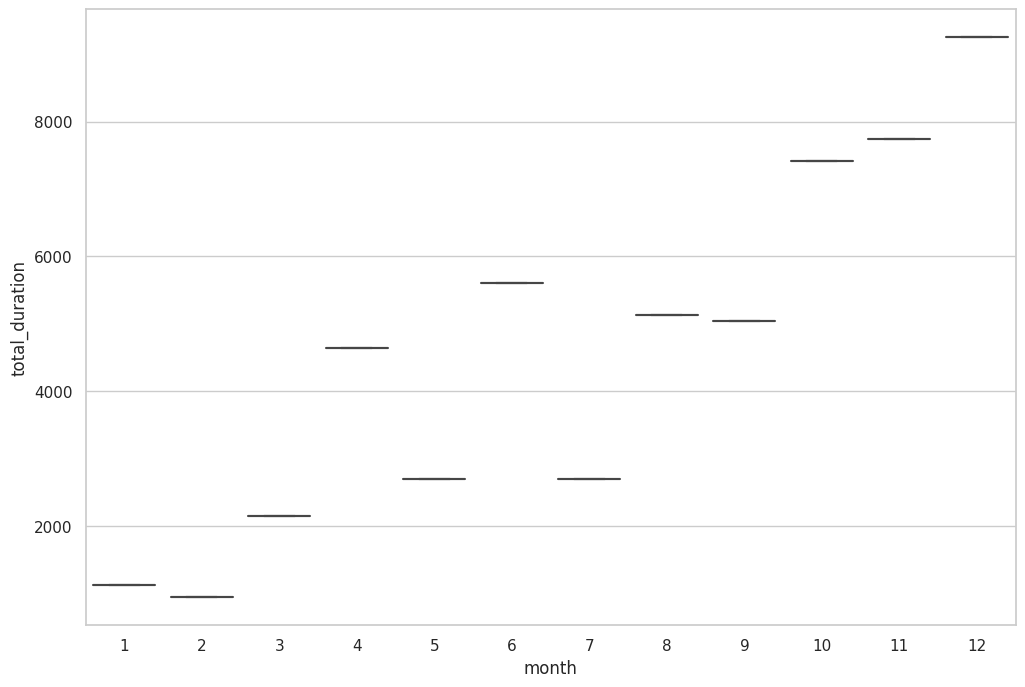

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns


# Agrupar por mes y calcular la suma total de duración de llamadas por mes
monthly_duration = df_full.groupby('month')['total_duration'].sum().reset_index()

# Configurar el estilo de los gráficos con seaborn
sns.set(style="whitegrid")

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='total_duration', data=monthly_duration)

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

import seaborn as sns


monthly_messages = df_full.groupby(['plan', 'month'])['n_messages'].sum().reset_index()

print(monthly_messages.head())

   plan  month  n_messages
0  surf      1        21.0
1  surf      2        21.0
2  surf      3        95.0
3  surf      4       317.0
4  surf      5        44.0


   plan  month  n_internet
0  surf      1        30.0
1  surf      2       170.0
2  surf      3       202.0
3  surf      4       326.0
4  surf      5       171.0


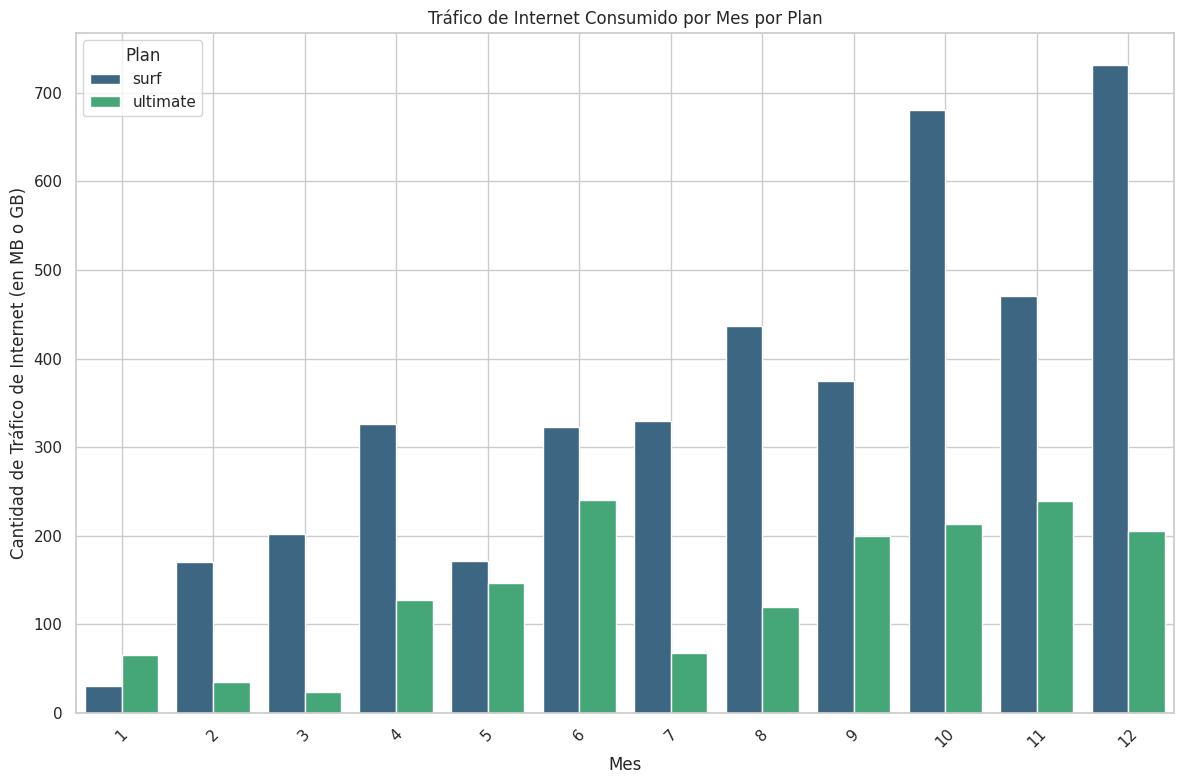

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Agrupar por plan y calcular la suma total de tráfico de Internet por mes
monthly_internet = df_full.groupby(['plan', 'month'])['n_internet'].sum().reset_index()

print(monthly_internet.head())

plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_internet, x='month', y='n_internet', hue='plan', palette='viridis')

# Personalizar el gráfico
plt.title('Tráfico de Internet Consumido por Mes por Plan')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Tráfico de Internet (en MB o GB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
#se puede observar que hay más tráfico de internet por mes en el plan surf, hay un cambio notable desde el segundo mes 

### Internet

In [ ]:
en promedio los usuarios del plan 'ultimate' utiliza más sus mensajes que los usuarios de 'surf', 

In [ ]:
 los usuarios del plan "ultimate" en promedio no llega a gastar sus Gb incluidos, lo que podría indicar que los usuarios de "surf" dejan más ingresos por pagar Gb extra cada mes

In [ ]:
en el caso de "surf" la mediana indica que por lo menos la mitad de usuarios gastan al rededor de 17 Gb y sólo se le incluyen 15 en su plan. Lo que podría indicar que dejan buena cantidad de ingresos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
 parece ser que aún cuando lo usuarios de "surf" dejan buenos ingresos al exceder sus Gb incluídos, los usuarios del plan "ultimate" por lo regular no exceden su plan

In [ ]:
al no llegar a su límite incluido, constantemente dejan los mismos ingresos, que son mayores a los de los ususarios de "surf".

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
df_full

In [ ]:
def levene_test(s1, s2, center='mean'):
    levene = st.levene(s1, s2, center=center)
    return levene

In [ ]:
# Crea variables para guardar las muestras de los usuarios que vamos a comparar.
mean_income_users_surf = df_full.query('plan=="surf"')['total_monthly_income']
mean_income_users_ultimate = df_full.query('plan=="ultimate"')['total_monthly_income']
# Aplicar la prueba de Levene para ver la igualdad de varianzas de nuestras muestras.
levene_test_plans = levene_test(mean_income_users_surf, mean_income_users_ultimate)
print(f'p-value de la prueba Levene: {levene_test_plans.pvalue}')
# Prueba la hipótesis
alpha = 0.05
if levene_test_plans.pvalue < alpha:
    equal_var = False
else:
    equal_var = True
results = st.ttest_ind(mean_income_users_surf, mean_income_users_ultimate, equal_var=equal_var)
print('p-value de la prueba T:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, generan diferentes ingresos.")
else:
    print("No rechazamos la hipótesis nula, generan iguales ingresos.")


NameError: name 'total_consume_user_month' is not defined

In [ ]:
# Crea variables para guardar las muestras de las áreas que vamos a comparar.
ny_nj_mean_income = df_full.query('isin_ny_nj == True')['total_monthly_income']
rest_mean = df_full.query('isin_ny_nj == False')['total_monthly_income']
# Aplicar la prueva de Levene para ver la igualdad de varianzas de nuestras muestras.
levene_test_area = levene_test(ny_nj_mean_income, rest_mean)
print(f'p-value de la prueba Levene: {levene_test_area.pvalue}')
# Prueba la hipótesis
alpha = 0.05
if levene_test_area.pvalue < alpha:
    equal_var = False
else:
    equal_var = True
results = st.ttest_ind(ny_nj_mean_income, rest_mean, equal_var=equal_var)
print('p-value de la prueba T:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, generan diferentes ingresos.")
else:
    print("No rechazamos la hipótesis nula, generan iguales ingresos.")

NameError: name 'df_full' is not defined

## Conclusión general



In [ ]:
La distribución de las llamadas de los usuarios de cada plan indica que los usuarios del plan 'surf' excede en cierta medida su límite de mínutos incluídos, lo que significa algunos ingresos extra por exceder su límite.
En la investigación de los mensajes observamos una situación similar, tenemos ingresos extra por usuarios que exceden el límite de sus mensajes.
Para el tráfico de datos, se observa que los usuarios del plan 'surf' al igual que en mensajes y llamadas dejan ingresos extra, sin embargo, en este apartado, el promedio de datos que utilizan los usuarios de este plan supera los datos incluidos en su plan, por lo cual son considerables los ingresos extra, teniendo en cuenta que hay más usarios del plan 'surf'.
En la investigación de los ingresos de los usuarios de cada plan, en promedio, los usuarios del plan 'ultimate' dejan más ingresos, sin embargo, en el último mes (Diciembre), los ingresos promedio de los ususarios del plan 'surf' alcanzaron USD $70, además, si observamos la suma de ingresos de los usuarios del plan 'surf' aumentaron considerablemente a lo largo del año, en comparación de los ingresos de los usuarios del plan 'ultimate', situación que se observa en los gráficos de los minutos, mensajes y Gb usados en cada plan, razón por la cual sería conveniente revisar qué se está haciendo bien en el plan 'surf'.
Al realizar la prueba de hipótesis estadística comprobamos que los ingresos son diferentes en los usuarios de cada plan, que confirma lo antes observado en los gráficos, lo que da pie a ponerle más atención al plan 'surf'
En cuanto a los ingresos de los usuarios del área de New York y New Jersey, observamos que nuestra hipotésis estadística indica que no podemos rechazar que los usuarios de esa área generan ingresos diferentes al resto de usuarios, entonces lo que se observa en el boxplot de la distribución de ingresos de ambas áreas, puede ser que los valores atípicos den una lectura errónea de los ingresos.